# **PREPARING THE DATASET**

Preparing The Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Project Capstone/

/content/drive/MyDrive/Project Capstone


In [4]:
dataset_path = '/content/drive/MyDrive/Project Capstone/new_dataset'

In [5]:
import os
file_list = os.listdir(dataset_path)
for image_class in file_list:
    print(image_class)

Symbolism
Expressionism
Academic
Rococo
Romanticism
Western Medieval
Realism
Primitivism
Renaissance
Baroque
Japanese
Nouveau
Neoclassicism


In [1]:
def list_images(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png']  # Specify the image file extensions you want to consider
    image_files = []
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if os.path.splitext(file)[1].lower() in image_extensions:
                image_files.append(os.path.join(root, file))
    
    return image_files

In [ ]:
# Call the function to list the images
image_files = list_images(folder_path)

# Print the list of image files
for image_file in image_files:
    print(image_file)

In [ ]:
batch_size = 32
img_size = (224,224)
instances = 100

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def expected_instances(instances):
    value = instances
    repetitions = len(class_names)
    my_list = [value] * repetitions
    return my_list

In [ ]:
#use class weight, the instance is not balanced
art_df = pd.DataFrame()
art_df['classes'] = class_names
art_df['amount'] = expected_instances(instances)

art_df['class_weight'] = art_df['amount'].sum() / (art_df.shape[0] * art_df['amount'])

print(art_df)                                   

             classes  amount  class_weight
0          Symbolism     100           1.0
1      Expressionism     100           1.0
2           Academic     100           1.0
3             Rococo     100           1.0
4        Romanticism     100           1.0
5   Western Medieval     100           1.0
6            Realism     100           1.0
7        Primitivism     100           1.0
8        Renaissance     100           1.0
9            Baroque     100           1.0
10          Japanese     100           1.0
11           Nouveau     100           1.0
12     Neoclassicism     100           1.0


# General Library

In [ ]:
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import Dense, InputLayer, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
#SPLITTING
#datagen for augmentation
#only apply augmentation for training dataset
#NO RUN
train_datagen = ImageDataGenerator(
    rotation_range=90,
    #width_shift_range=0.3,
    #height_shift_range=0.3,
    #brightness_range=(0.1, 0.9),
    shear_range=45.0,
    #zoom_range=[0.5, 1.5],
    #channel_shift_range=150.0,
    #horizontal_flip=True,
    #vertical_flip=True,
    rescale=1./255.,
)

val_datagen = ImageDataGenerator(
    rescale=1./255, 
)    

In [ ]:
#NO RUN

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    seed=42,
    target_size=img_size,
    batch_size=batch_size, 
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset='training',
    validation_split=0.1,
    classes=class_names
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    seed=42,
    target_size=img_size,
    batch_size=batch_size, 
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset='validation',
    validation_split=0.1,
    classes=class_names
)


In [ ]:
train_generator = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    seed=42,
    batch_size=batch_size, 
    shuffle=True,
    color_mode="rgb",
    subset='training',
    validation_split=0.1,
)

val_generator = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    seed=42,
    batch_size=batch_size, 
    shuffle=True,
    color_mode="rgb",
    subset='validation',
    validation_split=0.1,
)


Found 1300 files belonging to 13 classes.
Using 1170 files for training.
Found 1300 files belonging to 13 classes.
Using 130 files for validation.


In [ ]:
class_names = train_generator.class_names
print(class_names)

['Academic', 'Baroque', 'Expressionism', 'Japanese', 'Neoclassicism', 'Nouveau', 'Primitivism', 'Realism', 'Renaissance', 'Rococo', 'Romanticism', 'Symbolism', 'Western Medieval']


In [ ]:
def preprocess_image(image, label):
    # Resize the image to the desired size
    image = tf.image.resize(image, (224, 224))
    # Apply image augmentation operations
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    # Normalize the image
    image = image / 255.0
    return image, label

In [ ]:
def preprocess_image_val(image, label):

    # Normalize the image
    image = image / 255.0
    return image, label

In [ ]:
augmented_train_dataset = train_generator.map(preprocess_image)
rescaled_val_dataset = val_generator.map(preprocess_image_val)

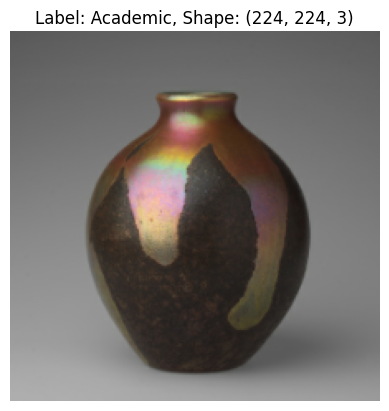

In [ ]:
# Get a random batch of images and labels
for images, labels in augmented_train_dataset:
    break

# Select a random index within the batch
index = tf.random.uniform(shape=(), maxval=batch_size, dtype=tf.int32)

# Select the image and label at the random index
image = images[index]
label = labels[index]

# Display the image
plt.imshow(image.numpy())
plt.title(f"Label: {class_names[np.argmax(label)]}, Shape: {image.shape}")
plt.axis('off')  # Remove axis
plt.show()


In [ ]:
#no run
import matplotlib.pyplot as plt

# conv the label
label_to_str = {v: k for k, v in train_generator.class_indices.items()}

# Display 3 random arts
for _ in range(3):
    img, label = train_generator.next()
    random_index = np.random.randint(0, img.shape[0])

    image = img[random_index]
    image_label = label[random_index]
    print(img.shape) 
    plt.imshow(image)
    label_list = image_label.tolist()  # Convert label to a list
    print(label_to_str[label_list[0]])

    plt.show()


# **Choosing The Model**

# 1. Using Pre-Trained Model MobileNetV2 Transfer Learning


In [ ]:
import tensorflow_hub as hub
from tensorflow.keras.applications import MobileNetV2

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [ ]:
feature_extractor = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False) 


In [ ]:
model = Sequential()
model.add(feature_extractor)
#model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(len(class_names), activation = 'relu'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_5 (Dropout)         (None, 1280)              0         
                                                                 
 dense_5 (Dense)             (None, 13)                16653     
                                                                 
Total params: 2,274,637
Trainable params: 16,653
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])

In [ ]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()

batch_stats_callback = CollectBatchStats()

In [ ]:
early_stopping = EarlyStopping(monitor='val_acc', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(augmented_train_dataset, epochs = 2,
                          validation_data=rescaled_val_dataset, callbacks=[batch_stats_callback, early_stopping])

Epoch 1/2
37/37 [==============================] - ETA: 0s - loss: 2.5495 - acc: 0.1667

ValueError: ignored

In [ ]:
#Using Fine Tune
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
modelv2 = Sequential()
modelv2.add(base_model)
modelv2.add(GlobalAveragePooling2D())
modelv2.add(Dropout(0.2))
modelv2.add(Dense(13, activation='relu'))

In [ ]:
# Select which layers to unfreeze for fine-tuning
unfreeze_layers = 20

# Unfreeze the top layers
for layer in modelv2.layers[-unfreeze_layers:]:
    layer.trainable = True

In [ ]:
modelv2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = modelv2.fit(train_generator, epochs = 2,
                          validation_data=val_generator, callbacks=[batch_stats_callback, early_stopping])

In [ ]:
plt.figure(figsize=(12,8))
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,15])
plt.plot(batch_stats_callback.batch_losses)
plt.title('model loss after each training step')
plt.legend(['train'], loc='upper left')

In [ ]:
print(history.history.keys())
plt.figure(figsize=(12,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Using VGG16, ResNET

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
vgg = VGG16(input_shape=[224,224] + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(class_names), activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['acc']
)

In [ ]:
history = model.fit(train_generator, epochs = 2,
                          validation_data=val_generator, callbacks=[batch_stats_callback, early_stopping])

Epoch 1/2
41/41 [==============================] - 1026s 25s/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 2.3086 - val_acc: 0.2885
Epoch 2/2
 5/41 [==>...........................] - ETA: 12:36 - loss: 2.4241 - acc: 0.1875

KeyboardInterrupt: ignored

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


In [ ]:
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()